# Capítulo 7 - Ejercicios
## Figuras



Este capítulo busca implementar la generación de figuras de alta calidad. 

## Primera ejercicio

Descargar el archivo chap7_data.dat y generar archivos formato .png

a) Graficar columna 1, contra columnas 2 y 3, en figuras separadas.

b) Graficar columna 1, contra columnas 3 y 6, en la misma figura.

c) Graficar columnas 2 contra 6, como nube de puntos, de color rojo,
y columnas 5 y 6 como nube de puntos de otro color. Interpretar lo
que se observa.

In [17]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller6/

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller6


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
import matplotlib.colors

<Figure size 432x288 with 0 Axes>

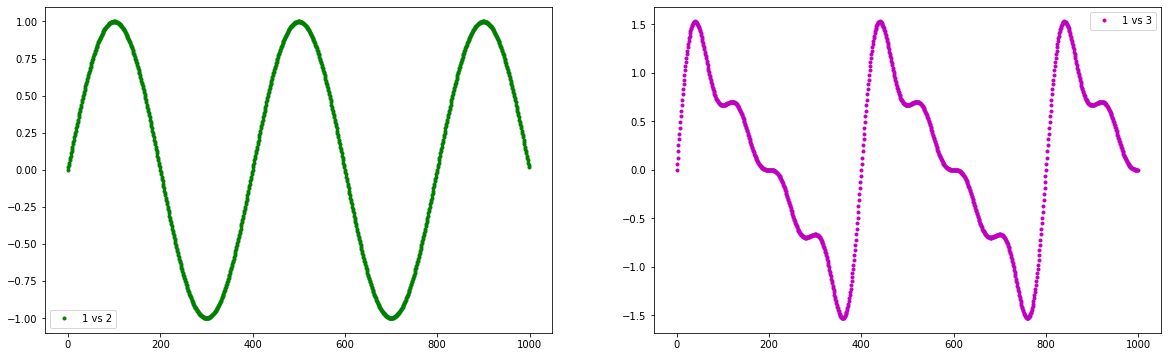

In [19]:
#1 contra columnas 2 y 3, en fig separadas
fname = 'data/chap7_data.dat'
data = np.loadtxt(fname,usecols=[0,1,2])
fig1 = plt.figure()
fig1,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(data[:,0],data[:,1],'.g',label='1 vs 2')
ax2.plot(data[:,0],data[:,2],'.m',label='1 vs 3')
ax1.legend()
ax2.legend()
plt.savefig('fig1.png')
plt.show()

<Figure size 432x288 with 0 Axes>

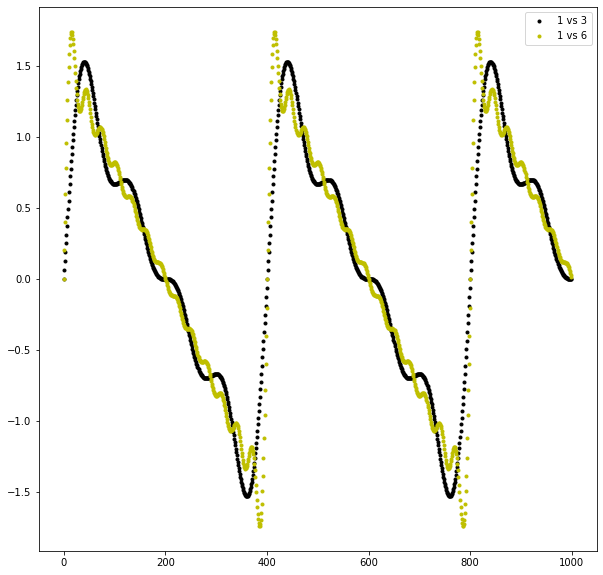

In [20]:
#1 contra columnas 3 y 6 en la misma figura
fname = 'data/chap7_data.dat'
data = np.loadtxt(fname)
columna_3 = data[:,2]
columna_6 = data[:,5]
fig2 = plt.figure()
fig2,ax = plt.subplots(figsize=(10,10))
ax.plot(data[:,0],columna_3,'.k',label='1 vs 3')
ax.plot(data[:,0],columna_6,'.y',label='1 vs 6')
ax.legend()
plt.savefig('fig2.png')
plt.show()

<Figure size 432x288 with 0 Axes>

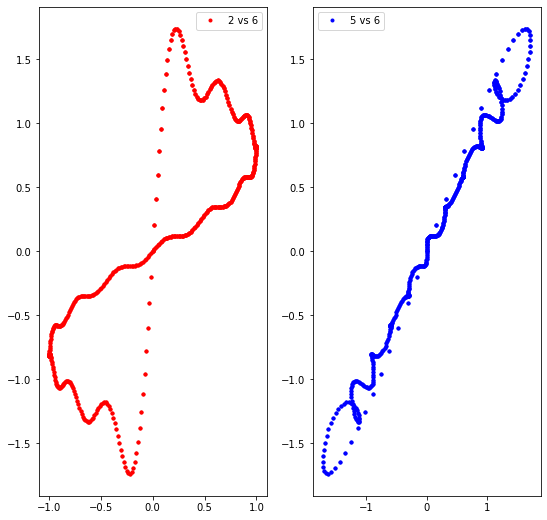

In [21]:
#2 contra 6 como nube de puntos rojos y 
#5 contra 6 como nube de otros colores
fname = 'data/chap7_data.dat'
data = np.loadtxt(fname)
columna_2 = data[:,1]
columna_5 = data[:,4]
columna_6 = data[:,5]
fig3 = plt.figure()
fig3,(ax1,ax2) = plt.subplots(1,2,figsize=(9,9))
ax1.plot(columna_2,columna_6,'.r',label='2 vs 6')
ax1.legend()
ax2.plot(columna_5,columna_6,'.b',label='5 vs 6')
ax2.legend()
plt.plot()
plt.savefig('fig3.png')
plt.show()

#**Una de las interpretaciones es que hay simetría por punto, es decir que hay una relación de espejo invertido que pasa por algún punto en el medio de la gráfica y que divida en dos a las gráficas, aunque es bueno decir que no es una relación perfecta 1 a 1 del 100% de correspondencia, pero es claro que hay simetría.**

## Segundo ejercicio

Utilizando la ecuación del movimiento parabólico,
$$
x = v_0 t cos(\theta)
$$
y
$$
y = v_0 t sin(\theta) -\frac{1}{2} g t^2
$$
donde $t$ es el tiempo, $v_0$ es la velocidad inicial, $g$ es la aceleración de la gravedad ( 9.8 m/s2), $(x, y)$ la posición en el tiempo $t$, y $\theta$ es el ángulo de disparo con respecto a la horizontal.

Asumiendo que desde la cima de un volcán se eyecta material (altura de 1 km), con una velocidad inicial de 200 km/hora

- Genere una figura de dos disparos con diferente ángulo, mostrando en línea punteada el movimiento parabólico de cada uno y en forma de puntos (o triángulos) la posición $(x, y)$ cada tiempo $t$ (por ejemplo cada segundo). Es decir, no graficar todos los puntos, solo cada 5 o 10 puntos. Muestre la distancia máxima que alcanza cada proyectil para llegar $y=0$ (nivel base). 



In [22]:
import numpy as np
import matplotlib.pyplot as plt
fmt='%2.3f'
g  = 9.8 # m/s2
t  = np.linspace(0,30,150)
yi = 1000 #m
x1,y1 = [],[]
x2,y2 = [],[]
teta1 = np.radians(float(input('Ingrese el primer ángulo en grados: ')))
teta2 = np.radians(float(input('Ingrese el segundo ángulo en grados: ')))
v0 = float(input('Ingrese la velocidad inicial de la partícula en km/h: '))
print('')
vi = float(0.277778*v0) #m/s
for s in t:
  xv1 = vi*s*(np.cos(teta1))
  x1.append(xv1)
  yv1 = yi + (vi*s*(np.sin(teta1)))-(1/2)*g*(s**2)
  y1.append(yv1)
  if yv1<0:
    print('Tiempo 1:',fmt%(s),'s, Distancia max 1:',fmt%(xv1),'m, Teta 1 en rad:',fmt%(teta1))
    break
for s in t:
  xv2 = vi*s*(np.cos(teta2))
  x2.append(xv2)
  yv2 = yi + (vi*s*(np.sin(teta2)))-(1/2)*g*(s**2)
  y2.append(yv2)
  if yv2<0:
    print('Tiempo 2:',fmt%(s),'s, Distancia max 2:',fmt%(xv2),'m, Teta 2 en rad:',fmt%(teta2))
    break
#Los datos quedan puestos:

Ingrese el primer ángulo en grados: 72.15
Ingrese el segundo ángulo en grados: 45.67
Ingrese la velocidad inicial de la partícula en km/h: 156.79

Tiempo 1: 19.329 s, Distancia max 1: 258.042 m, Teta 1 en rad: 1.259
Tiempo 2: 17.919 s, Distancia max 2: 545.366 m, Teta 2 en rad: 0.797


<Figure size 432x288 with 0 Axes>

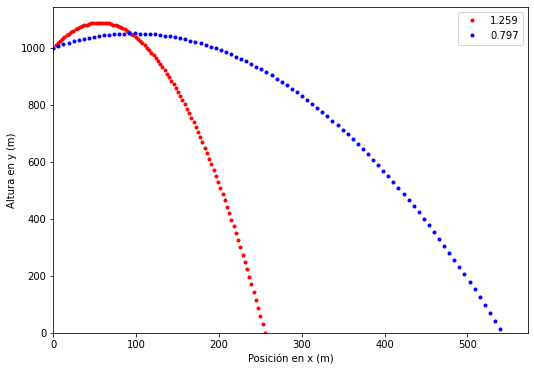

In [23]:
import matplotlib.colors as cm

fig4 = plt.figure()
fig4,ax = plt.subplots(figsize=(8.5,6))
ax.plot(x1,y1,'.r',label=fmt%(teta1))
ax.plot(x2,y2,'.b',label=fmt%(teta2))
ax.set_xlim(0.0)
ax.set_ylim(0.0)
ax.set_xlabel('Posición en x (m)')
ax.set_ylabel('Altura en y (m)')
ax.legend()
plt.plot()
plt.savefig('fig4.png')
plt.show()

In [24]:
print('Fin del taller <:°)')

Fin del taller <:°)
